<a href="https://colab.research.google.com/github/kashafnaveed123/DataAnalysisProject/blob/main/DataAnanlysisProject_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis Project**

**Loading Libraries**

In [2]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Datasets**

In [38]:
# =============loading datasets===============
from sklearn.datasets import load_iris
data=load_iris()
# ===> to see the data which loads which load_iris
# print(data)
# ===> to see the feature names
# print(data.feature_names)
# ===> to see the data which we have to analysis
# print(data.data)
# ===> to see the targeted data
# print(data.target)
# ===>to see specie name which showing in the form of 0,1,2 form in the target
# species_names=data.target_names[data.target]
# print(species_names)
# ===> to see the specie names without repetition
# unique_species = np.unique(species_names)
# print(unique_species)

df=pd.DataFrame(data.data ,columns=data.feature_names)
print(df)
df['target']=data.target
print(df.head())

# ===> To see the required indexes
# print(df.iloc[100:125])

originalShape=df.shape
print("Original shape:", originalShape)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
   sepal length (cm)  sepal width (cm)  

To see the outliers list which are in dataset


In [35]:
import pandas as pd
import numpy as np

outliers_df = pd.DataFrame()

# Outliers detection and removal using IQR
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

for col in df.select_dtypes(include=np.number).columns:
  # if col != "target":
    outliers = get_outliers(df, col)
    print(f"\nOutliers in column: {col}")
    outliers_df = pd.concat([outliers_df, outliers])

print("\nAll detected outliers combined:")
print(outliers_df.drop_duplicates())



Outliers in column: sepal length (cm)

Outliers in column: sepal width (cm)

Outliers in column: petal length (cm)

Outliers in column: petal width (cm)

Outliers in column: target

All detected outliers combined:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    target  
15       0  
32       0  
33       0  
60       1  


**Data Processing**



In [36]:
# ==========Data processing=============
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=np.number)),columns=df.select_dtypes(include=np.number).columns)


# df.select_dtypes(include=np.number)==> This selects only numeric data from dataframes
# columns=df.select_dtypes(include=np.number).columns ==> This parts takes the column names form the data frame
# fit_transform()==>	Learn from data and apply scaling (Rescaling the data so that all numeric values fall within the same range (like 0,1,-1), or have a similar scale.)

print(df_scaled)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.143017         -0.131979          -1.340227         -1.315444   
2            -1.385353          0.328414          -1.397064         -1.315444   
3            -1.506521          0.098217          -1.283389         -1.315444   
4            -1.021849          1.249201          -1.340227         -1.315444   
..                 ...               ...                ...               ...   
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671   

       target  
0   -1.2247

**Outliers detection and removal**

In [20]:
# ==============Outliers detection and removal===========
# using IQR method
def remove_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  # to apply all the numeric functions
for col in df.select_dtypes(include=np.number).columns:
  df =remove_outliers(df,col)
  print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

**Comparison between original and new shapes**

In [14]:
 print("Original shape:", originalShape)

for col in df.select_dtypes(include=np.number).columns:
    before = originalShape[0]
    df = remove_outliers(df, col)
    after = df.shape[0]
    print(f"Column: {col} | Rows removed: {before - after}")

print("Final shape after removing all outliers:", df.shape)


Original shape: (150, 5)
Column: sepal length (cm) | Rows removed: 4
Column: sepal width (cm) | Rows removed: 4
Column: petal length (cm) | Rows removed: 4
Column: petal width (cm) | Rows removed: 4
Column: target | Rows removed: 4
Final shape after removing all outliers: (146, 5)


**Exploratory Data Analysis (EDA)**

In [55]:
df.describe()
# correlatiom matrix
corr_matrix=df.corr()
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.123144           0.879362   
sepal width (cm)           -0.123144          1.000000          -0.406141   
petal length (cm)           0.879362         -0.406141           1.000000   
petal width (cm)            0.822587         -0.340602           0.961866   
target                      0.788053         -0.405380           0.947460   

                   petal width (cm)    target  
sepal length (cm)          0.822587  0.788053  
sepal width (cm)          -0.340602 -0.405380  
petal length (cm)          0.961866  0.947460  
petal width (cm)           1.000000  0.955638  
target                     0.955638  1.000000  


**Visualization**

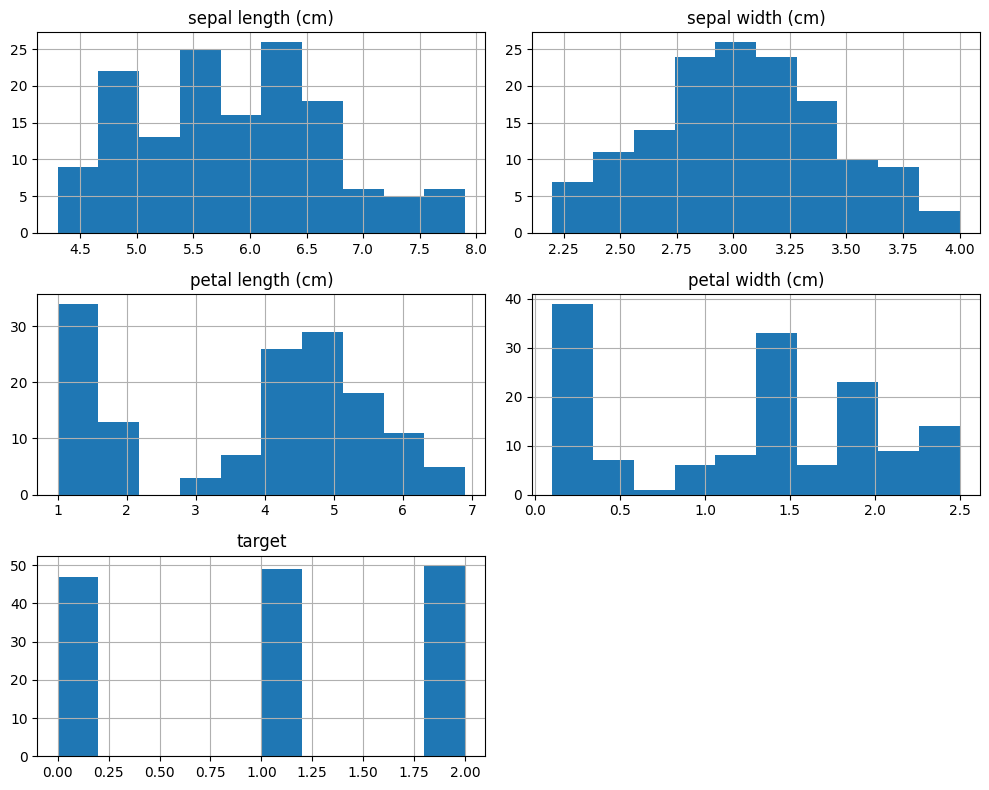

In [63]:
df.hist(figsize=(10,8))
# matplotlib
# plt.tight_layout()

<Axes: >

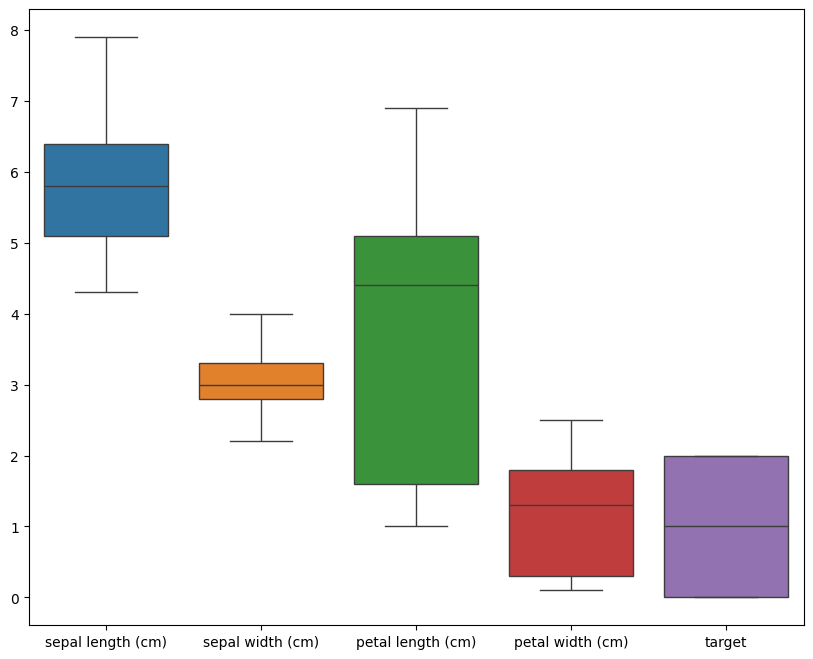

In [66]:
# boxplots
plt.figure(figsize=(10,8))
sns.boxplot(data=df.select_dtypes(include=np.number))


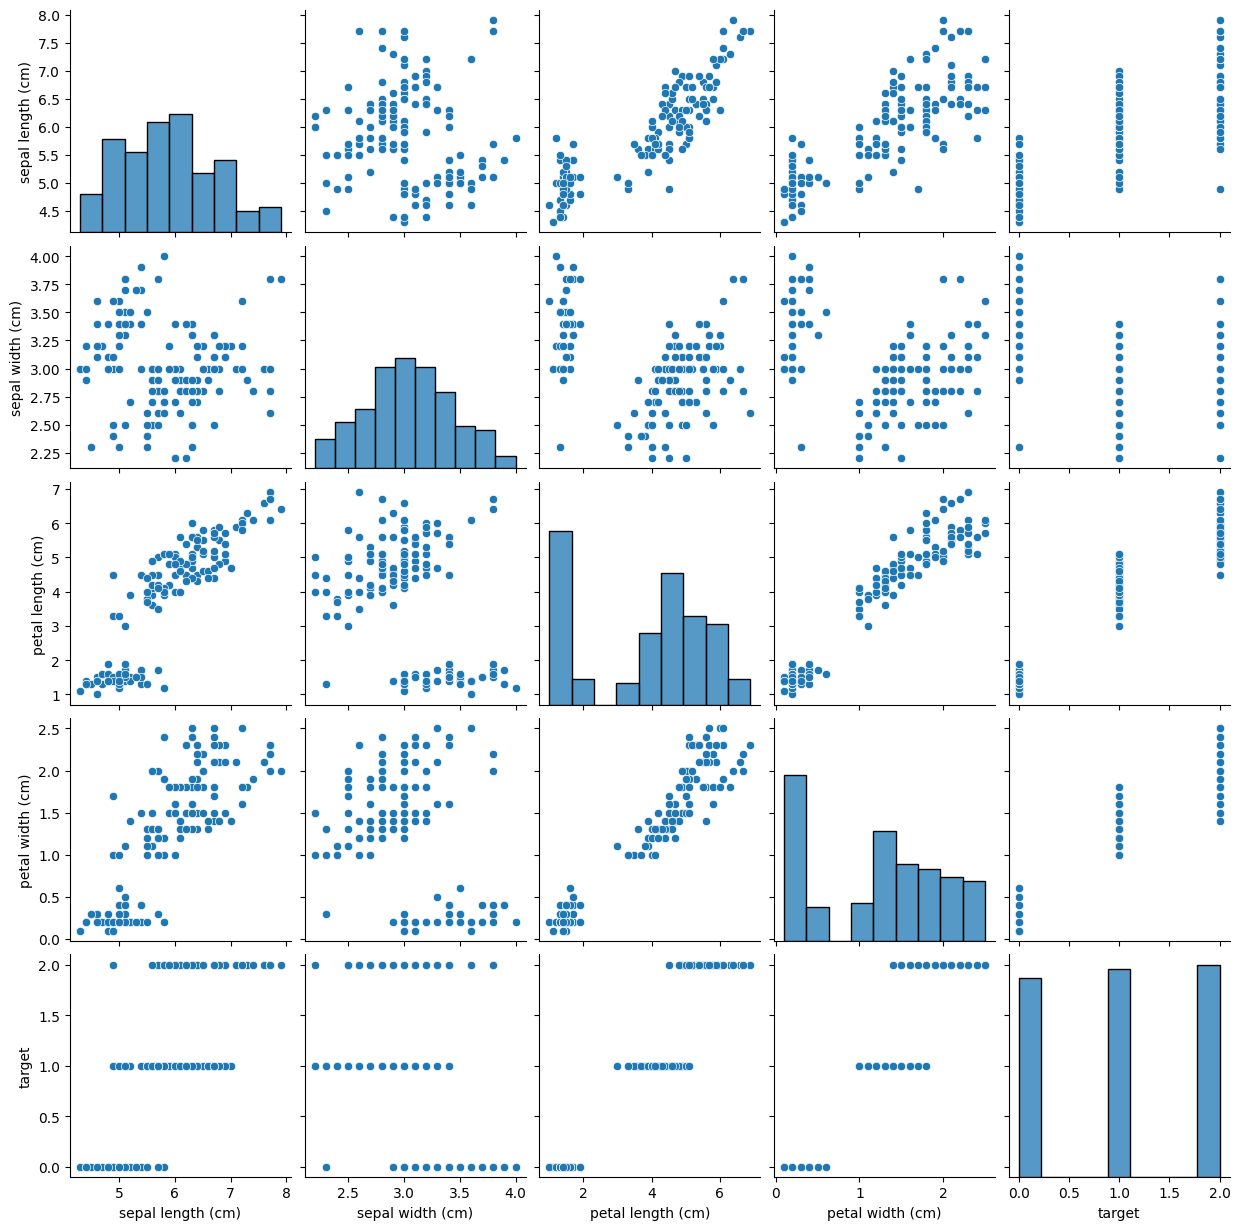

In [67]:
# Scatterplot matrix
sns.pairplot(df)
plt.show()

<Axes: >

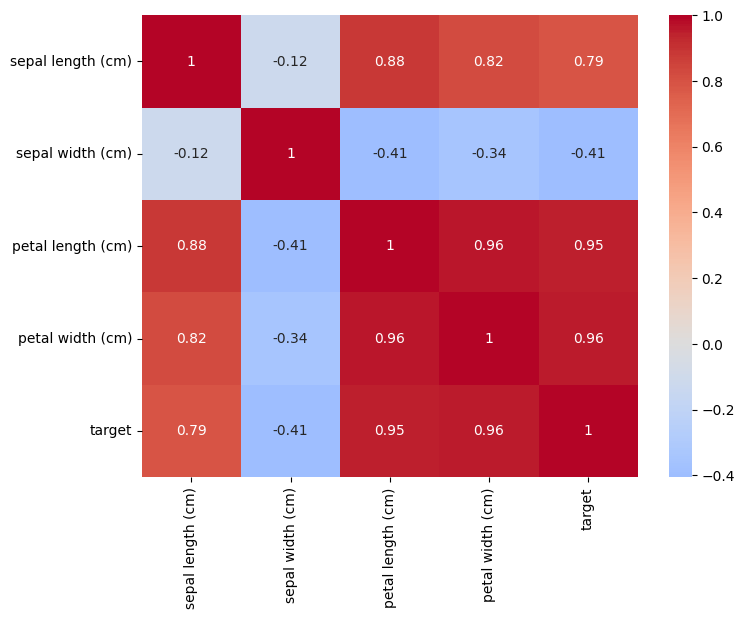

In [73]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# **Conclusion**

## Data Preprocessing

Before analyzing the data, we need to ensure it's clean and properly formatted.

### Missing Values

We first checked for missing values in the dataset. Handling missing values is crucial because many machine learning algorithms cannot work with missing data.

In our case, we found 4 missing values in columns. We decided to drop them.